# 1. Setting up Python and Importing Data

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import plotly.express as px

In [3]:
# Import all the CSV files (US, CA, DE, GB, FR, IN, JP, KR, MX, RU)
files = [i for i in glob.glob('/Users/{Username}/Desktop/Data/1718/*.{}'.format('csv'))]
sorted(files)

['1718/CAvideos.csv',
 '1718/DEvideos.csv',
 '1718/FRvideos.csv',
 '1718/GBvideos.csv',
 '1718/INvideos.csv',
 '1718/JPvideos.csv',
 '1718/KRvideos.csv',
 '1718/MXvideos.csv',
 '1718/RUvideos.csv',
 '1718/USvideos.csv']

In [4]:
dfs = list()
# add country column
for csv in files:
    df = pd.read_csv(csv,index_col='video_id', encoding="ISO-8859-1")
    df['country'] = csv[5:7]
    dfs.append(df)
video_df = pd.concat(dfs)
video_df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX


Data Cleaning and Feature Engineering

In [5]:
#filling in empty spaces in the description column
video_df['description'] = video_df['description'].apply(lambda x: '' if pd.isnull(x)  else x)

# converting dates and times and creating a new column for publish time
video_df['trending_date'] = pd.to_datetime(video_df['trending_date'],errors='coerce', format='%y.%d.%m')
video_df['publish_time'] = pd.to_datetime(video_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

video_df = video_df.dropna(how='any',inplace=False, axis = 0)

video_df.insert(4, 'publish_date', video_df['publish_time'].dt.date)
video_df['publish_time'] = video_df['publish_time'].dt.time
video_df = video_df[video_df.index != '#NAME?']

# full set of combined data, keep for later use
df_full = video_df.reset_index().sort_values('trending_date').set_index('video_id')
# which only keep the last entry if duplicated because it carries latest stat)
video_df = video_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
df_full.tail()

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
Ev3-7HLcZ5o,2018-06-14,Joe Rogan Experience #1131 - Dave Rubin,PowerfulJRE,22,2018-06-13,23:28:29,"Joe Rogan Experience|""podcast""|""JRE #1131""|""Da...",389123,9622,1374,2759,https://i.ytimg.com/vi/Ev3-7HLcZ5o/default.jpg,False,False,False,"Dave Rubin is a stand-up comedian, talk show h...",CA
-LWAuvg3aL4,2018-06-14,Grant doesn't think Cassidy is genuine | Love ...,Love Island Australia,24,2018-06-13,11:09:04,"Elias|""Jaxon""|""Stripper""|""John""|""James""|""John ...",162166,1059,107,0,https://i.ytimg.com/vi/-LWAuvg3aL4/default.jpg,True,False,False,The Villa finds out that Cassidy and Josh have...,CA
3f32gDWzMx8,2018-06-14,SHOW DAY!!!!,Christian Guzman,22,2018-06-13,13:48:15,"CHRISTIAN|""GUZMAN""|""ALPHALETE""|""VLOG""|""RELATIO...",212708,27664,166,2172,https://i.ytimg.com/vi/3f32gDWzMx8/default.jpg,False,False,False,â¢ Alphalete: http://www.alphaleteathletics.c...,CA
CJsOuGOB2zs,2018-06-14,"WANTED SA RADYO FULL EPISODE | June 13, 2018",Raffy Tulfo in Action,25,2018-06-13,09:40:42,"tulfo|""raffy tulfo""|""raffy tulfo in action""|""w...",218240,2388,262,504,https://i.ytimg.com/vi/CJsOuGOB2zs/default.jpg,False,False,False,"WANTED SA RADYO FULL EPISODE | June 13, 2018Yo...",CA
4YFo4bdMO8Q,2018-06-14,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,10,2018-05-11,04:06:35,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...,GB


In [6]:
# Insert category column
video_df['category_id'] = video_df['category_id'].astype(str)
df_full['category_id'] = video_df['category_id'].astype(str)

category_id = {}
# every country category_id files are same
with open('1718/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

video_df.insert(4, 'category', video_df['category_id'].map(category_id))
df_full.insert(4, 'category', df_full['category_id'].map(category_id))
category_list = video_df['category'].unique()
category_list

array(['Entertainment', 'Science & Technology', 'Comedy', 'Sports',
       'News & Politics', 'Film & Animation', 'Education',
       'Howto & Style', 'Music', 'Pets & Animals', 'Autos & Vehicles',
       'People & Blogs', 'Nonprofits & Activism', 'Gaming', 'Shows',
       'Travel & Events', 'Movies', 'Trailers'], dtype=object)

Q1. What is the time range of the data?

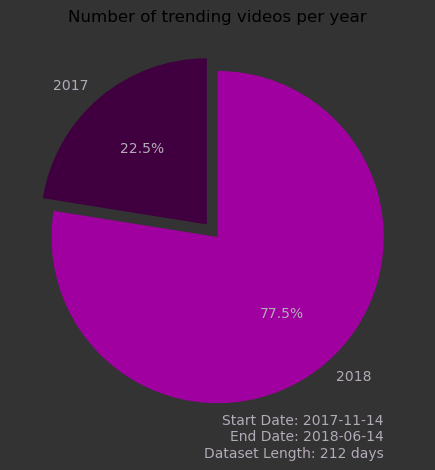

In [9]:
##which years do we have data for?
year_counts = df_full['trending_date'].apply(lambda x: x.year).value_counts().sort_index()
fig, ax = plt.subplots()

# Plot
ax.pie(year_counts,autopct='%1.1f%%', startangle=90, labels = [2017,2018],colors=['#400040', '#A000A0'], explode=(0.1, 0),textprops={'color':'#b4abb8'})
ax.set_title('Number of trending videos per year')
# ax.ylabel('')  # hide the y-label as it's not necessary for pie charts

fig.set_facecolor('#333333')
# Adding annotations for the start and end dates
start_date = df_full['trending_date'].min().strftime('%Y-%m-%d')
end_date = df_full['trending_date'].max().strftime('%Y-%m-%d')
diff_days = (pd.to_datetime(end_date)-pd.to_datetime(start_date)).days

ax.text(1, -1.1, f'Start Date: {start_date}', ha='right', va='center', fontsize=10, color='#b4abb8')
ax.text(1, -1.2, f'End Date: {end_date}', ha='right', va='center', fontsize=10, color='#b4abb8')
ax.text(1, -1.3, f'Dataset Length: {diff_days} days',ha='right', va='center', fontsize=10, color='#b4abb8')
plt.tight_layout()
plt.show()

Q2. Are there gaps in the data?

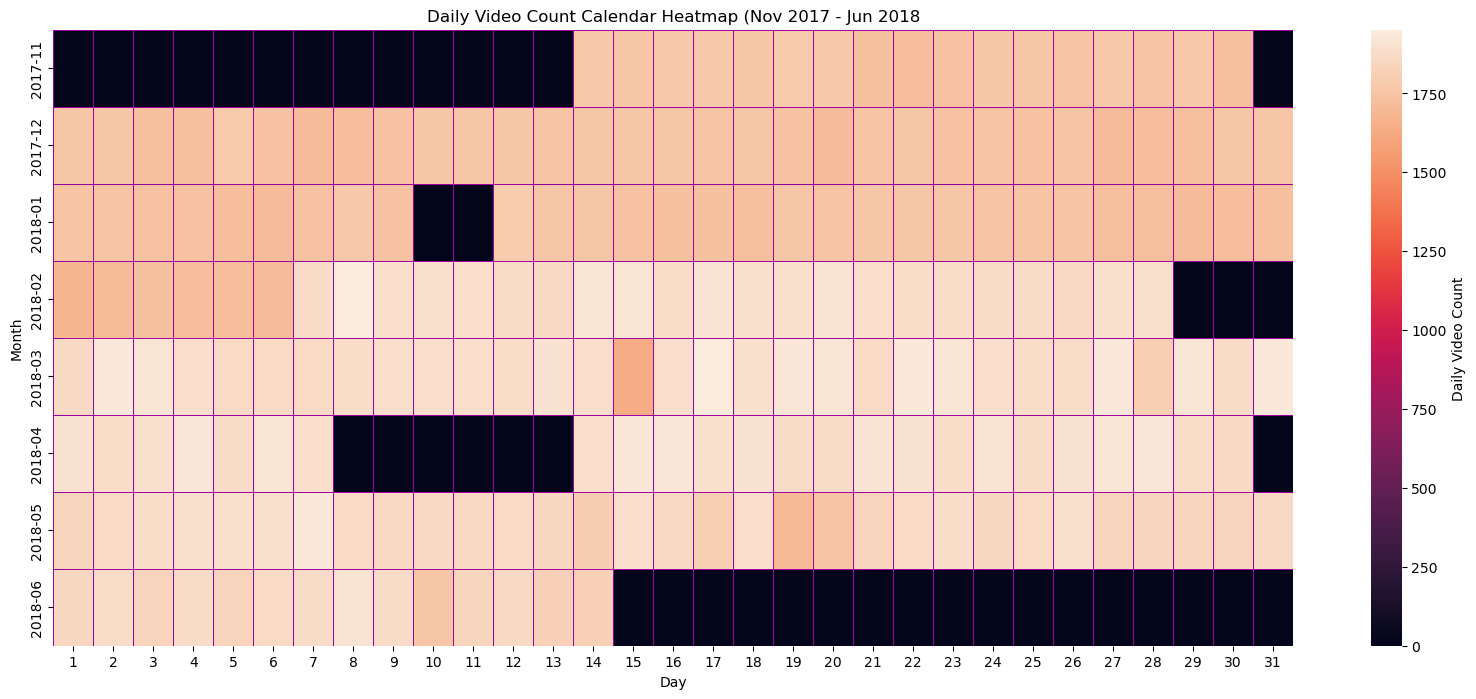

In [10]:
# Complete the date range for missing dates and fill NaN where there's no data
all_dates = pd.date_range(start="2017-11-14", end="2018-06-14")
series_data = df_full.groupby('trending_date').size()
series_data = series_data.reindex(all_dates).fillna(0)

# Reshape the data for the heatmap
df_heatmap = series_data.reset_index()
df_heatmap['month'] = df_heatmap['index'].dt.strftime('%Y-%m')
df_heatmap['day'] = df_heatmap['index'].dt.day

heatmap_data = df_heatmap.pivot_table(values=0, index='month', columns='day', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(heatmap_data, cbar_kws={'label': 'Daily Video Count'},linewidths=.5,linecolor='#A000A0')
ax.set_title('Daily Video Count')
cbar = ax.collections[0].colorbar
cbar.set_label(label= 'Daily Video Count')
ax.set_xlabel('Day')
ax.set_ylabel('Month')
ax.set_title('Daily Video Count Calendar Heatmap (Nov 2017 - Jun 2018')
plt.show()

We can see that there are some gaps in 2017-Nov(11th), 2018-Jan(10thand11th), 2018-Feb(29-31st), and 2018-April(8th-13th, 31st).

Each countries gap: US, CA, DE, GB, FR, IN, JP, KR, MX, RU

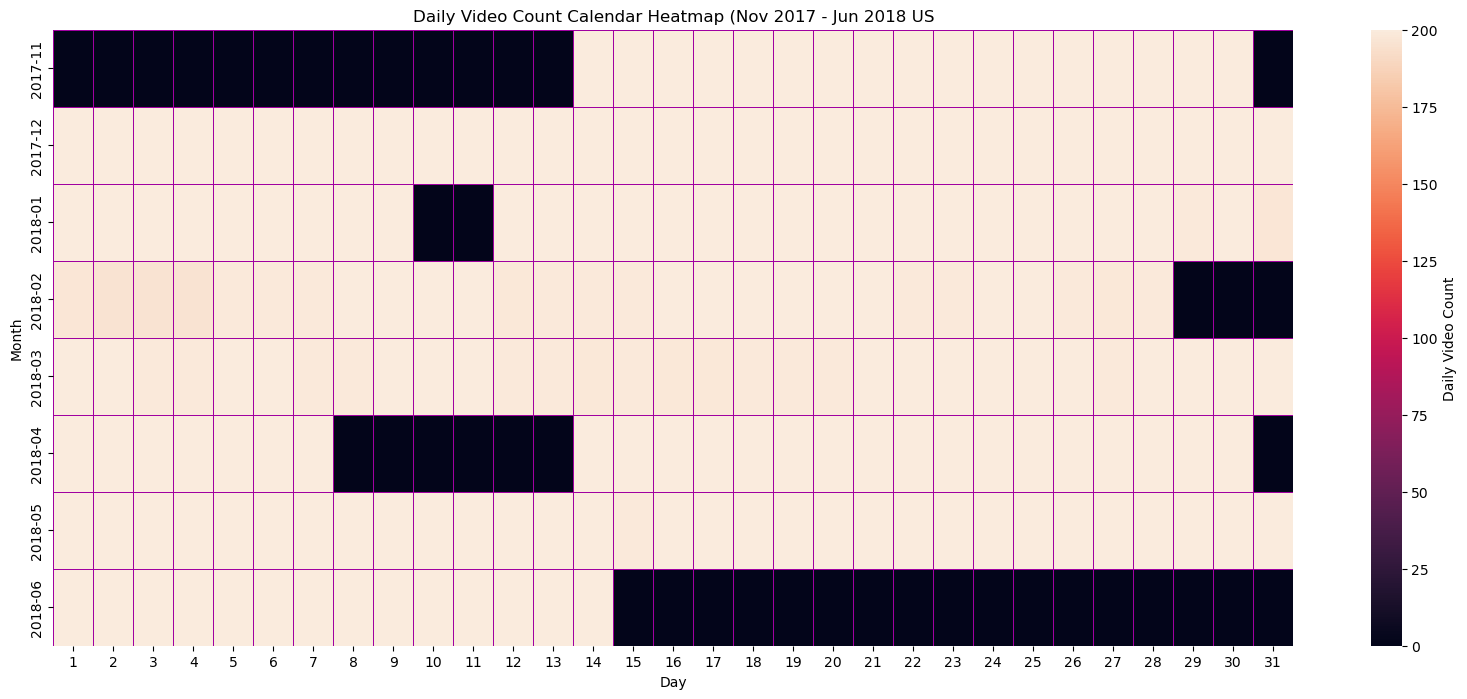

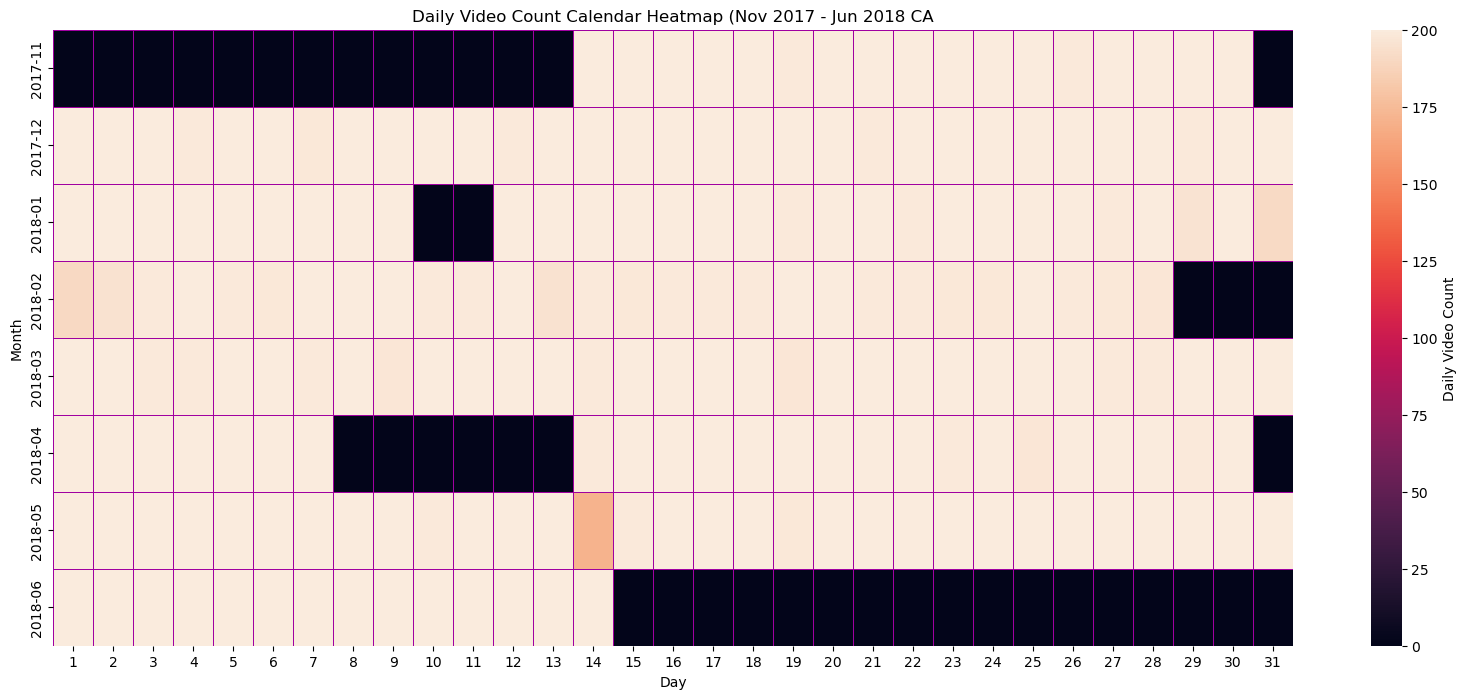

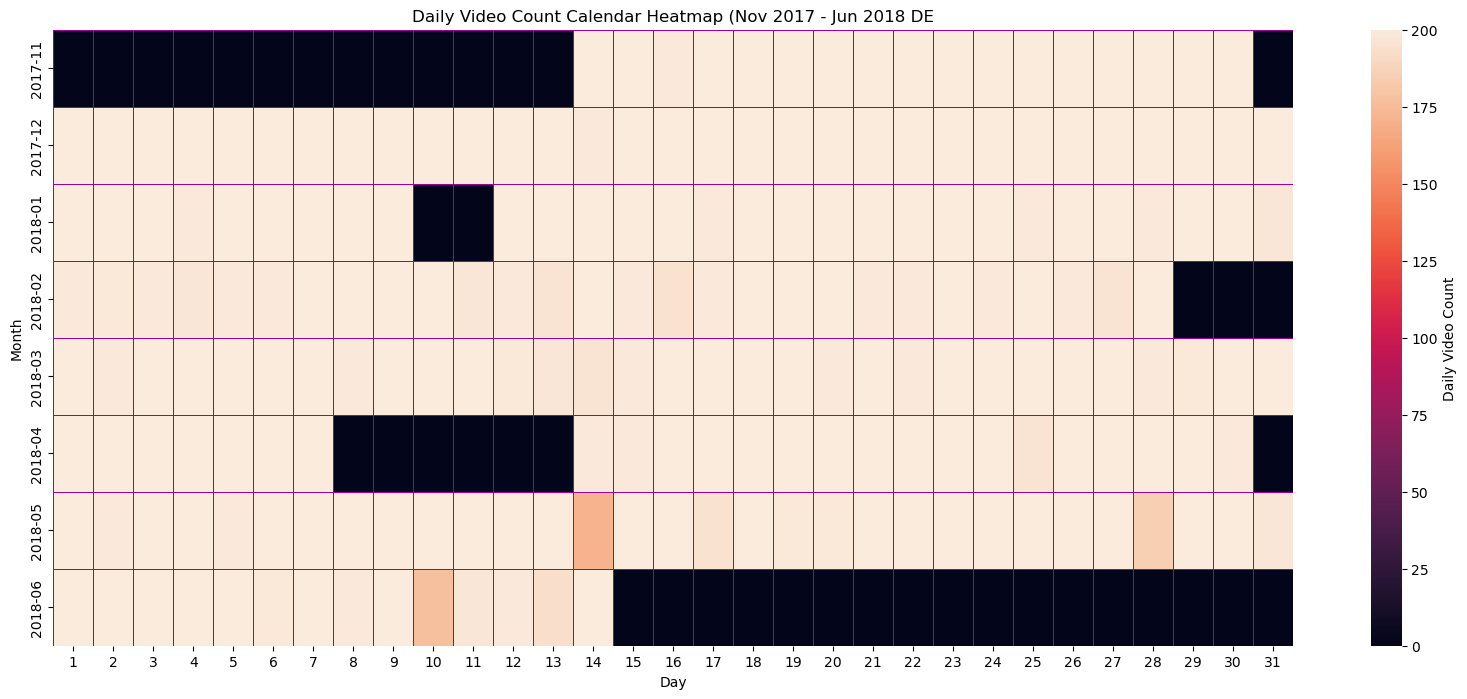

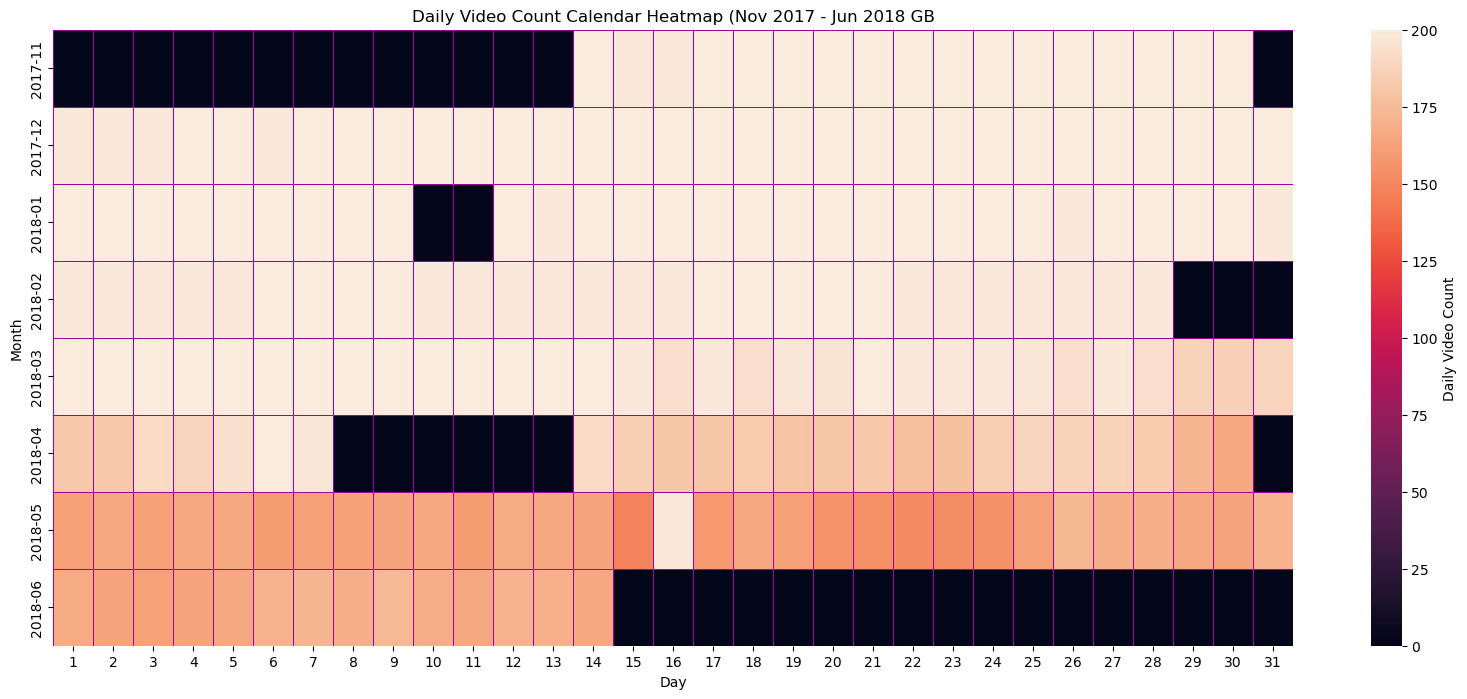

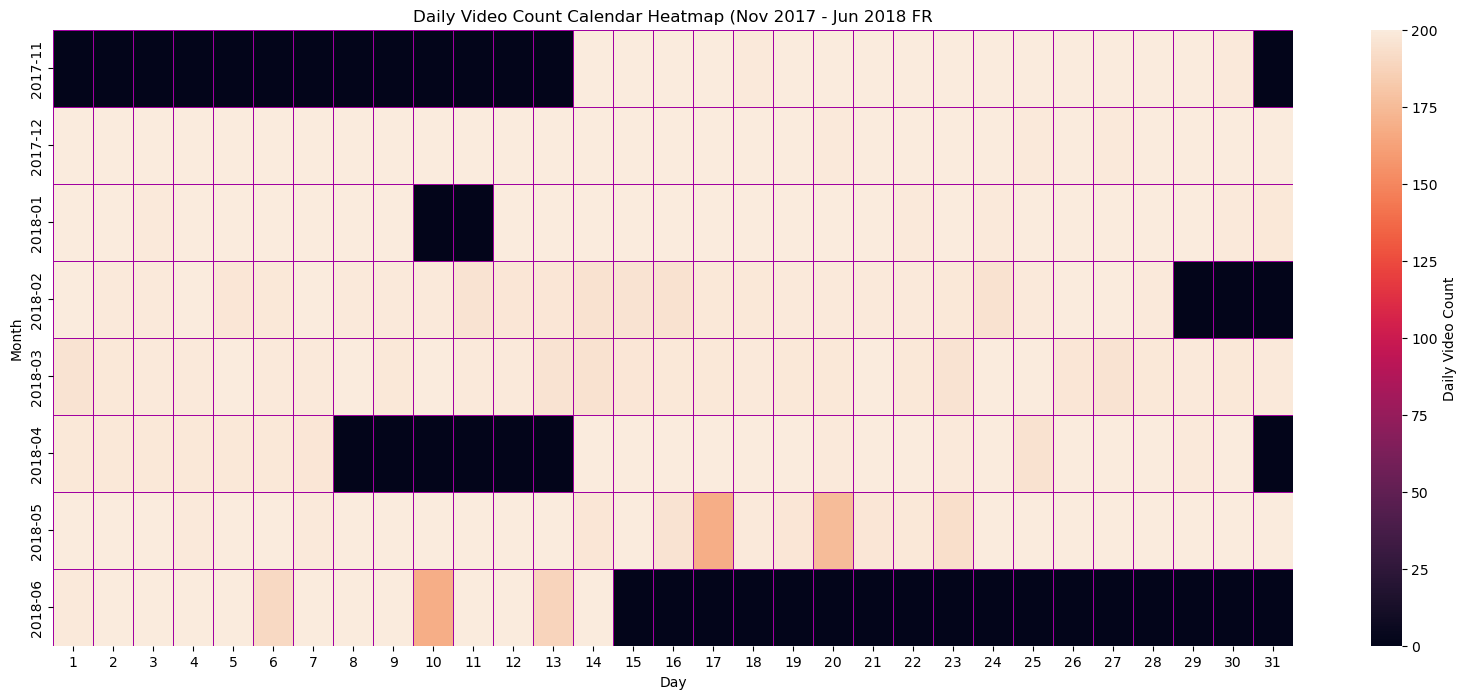

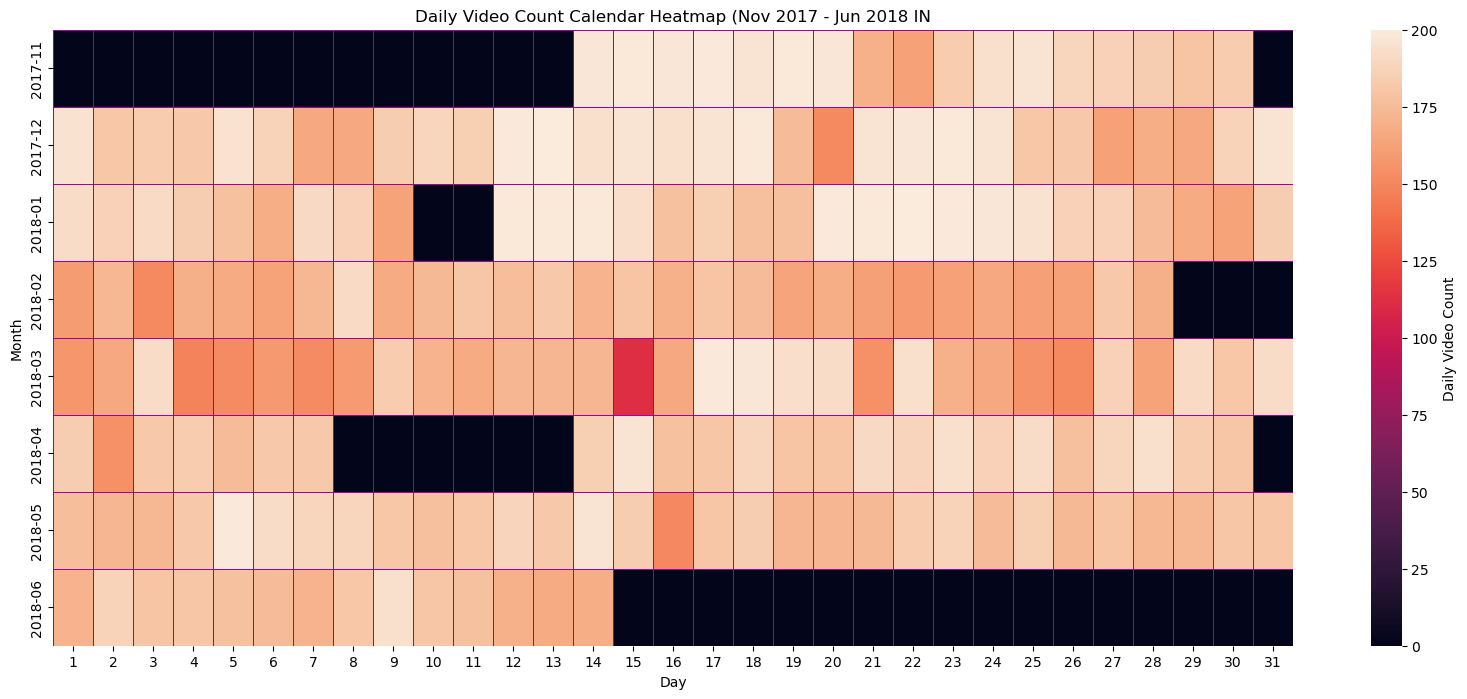

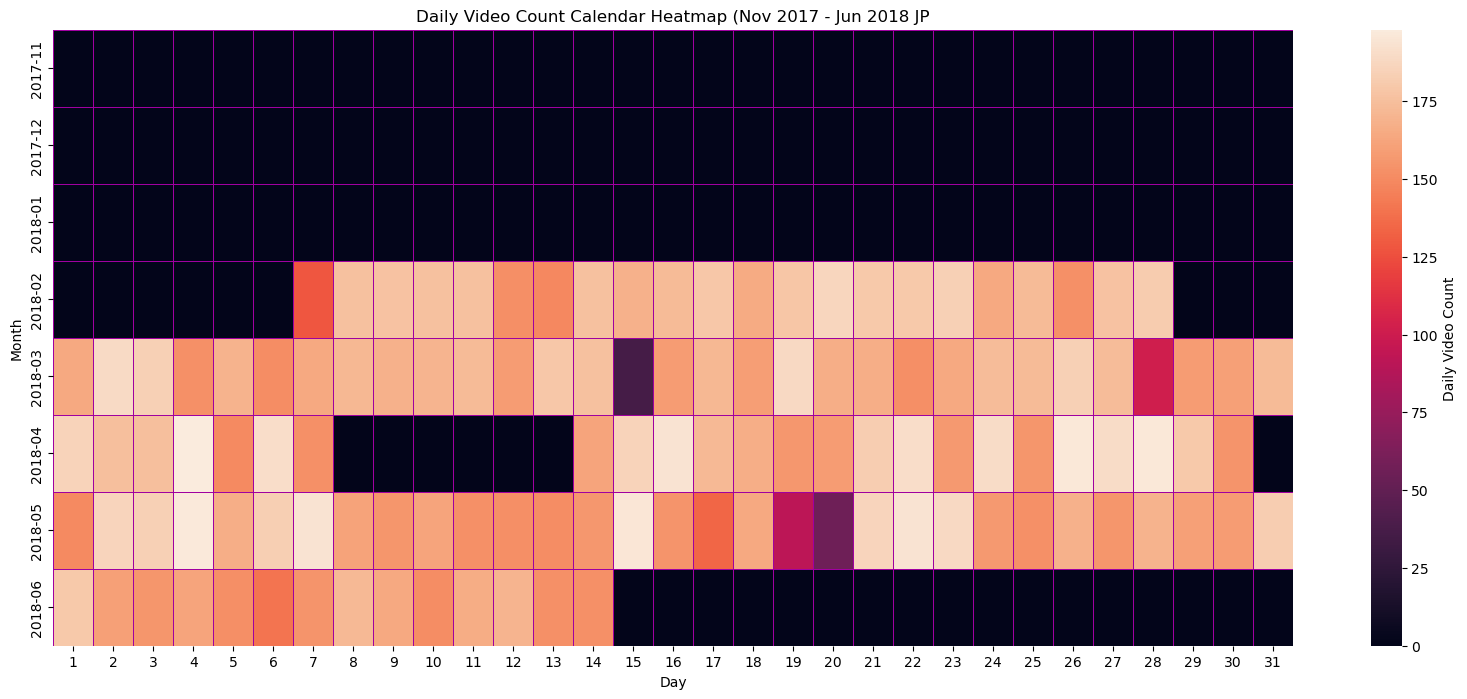

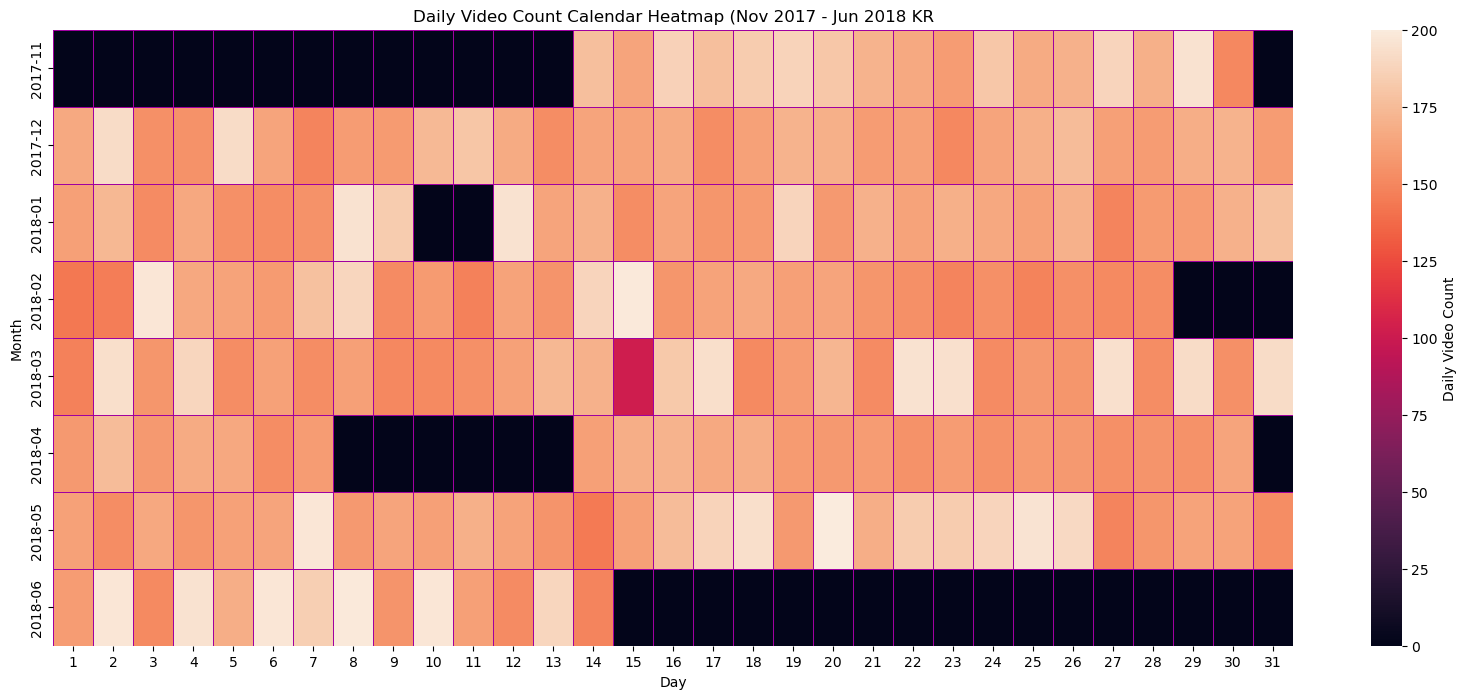

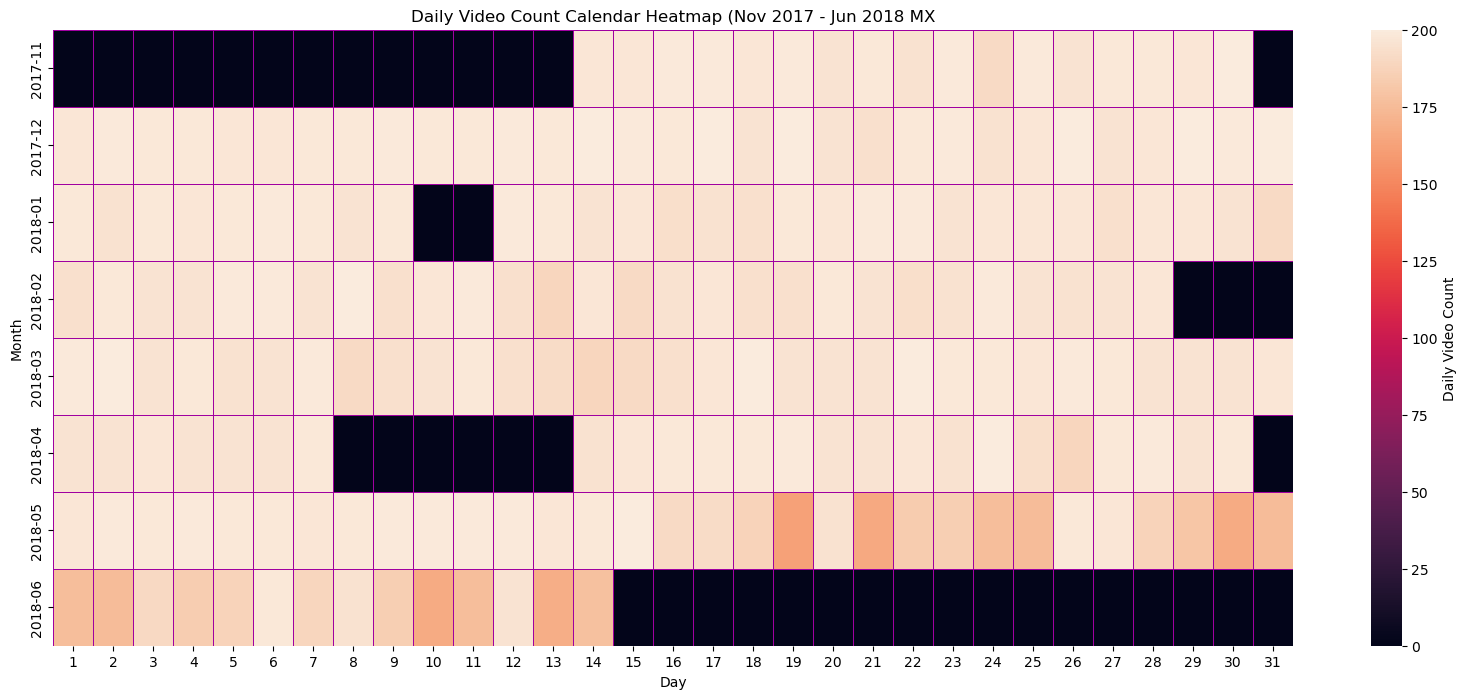

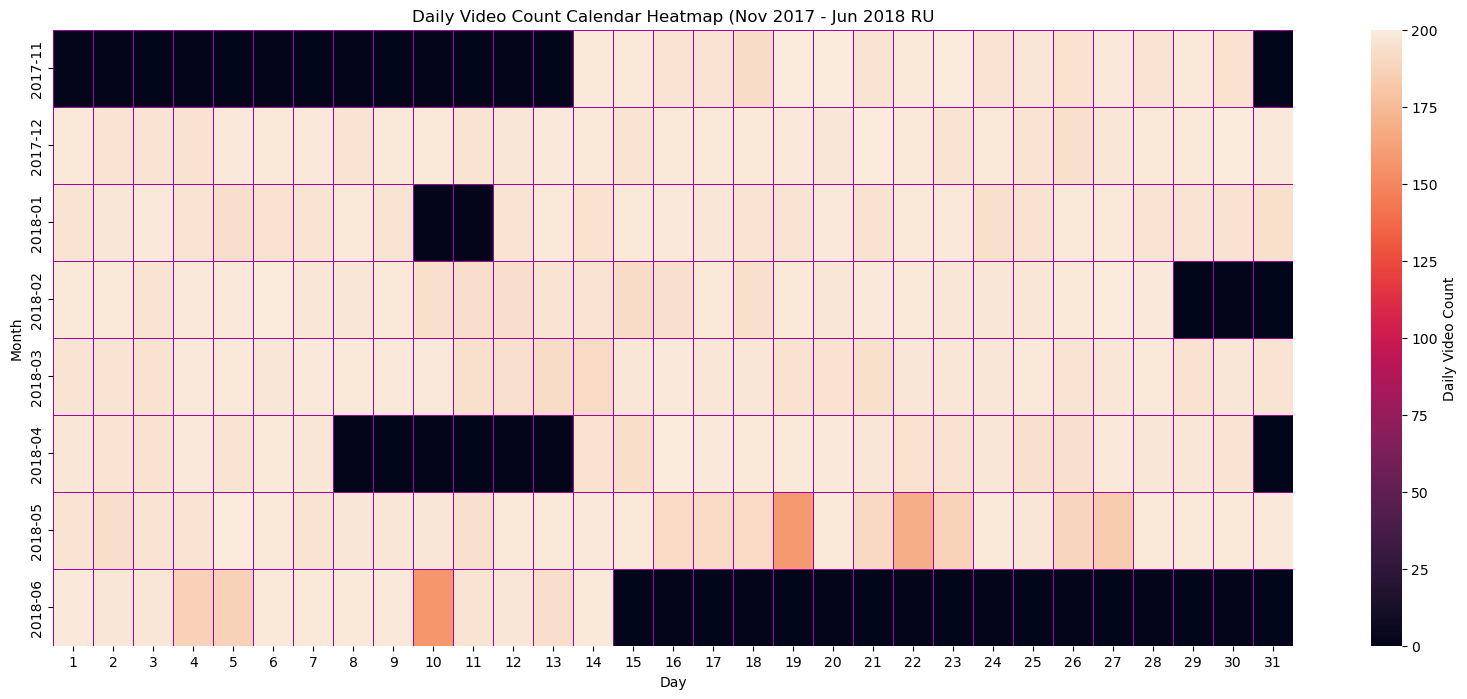

In [11]:
countries = ['US', 'CA', 'DE', 'GB', 'FR', 'IN', 'JP', 'KR', 'MX', 'RU']
for c in countries:
    country_data = df_full[df_full['country']== c]
    series_data = country_data.groupby('trending_date').size()
    series_data = series_data.reindex(all_dates).fillna(0)

    # Reshape the data for the heatmap
    df_heatmap = series_data.reset_index()
    df_heatmap['month'] = df_heatmap['index'].dt.strftime('%Y-%m')
    df_heatmap['day'] = df_heatmap['index'].dt.day

    heatmap_data = df_heatmap.pivot_table(values=0, index='month', columns='day', fill_value=0)

    # Plotting the heatmap
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(heatmap_data, cbar_kws={'label': 'Daily Video Count'},linewidths=.5,linecolor='#A000A0')
    ax.set_title('Daily Video Count')
    cbar = ax.collections[0].colorbar
    cbar.set_label(label= 'Daily Video Count')
    ax.set_xlabel('Day')
    ax.set_ylabel('Month')
    ax.set_title('Daily Video Count Calendar Heatmap (Nov 2017 - Jun 2018 ' + c)
    plt.show()

# Q3. When were videos published?

In [48]:
df_full['publish_hour'] = df_full['publish_time'].astype(str).str.split(':').str[0].astype(int)
repeat_vids = df_full.groupby(['publish_hour'])['category'].value_counts().reset_index(name='count_cate')
repeat_vids = repeat_vids.rename(columns={'category':'Category Title'})
repeat_vids = repeat_vids.rename(columns={'publish_hour':'Hour of the day'})
repeat_vids_pivot_data = repeat_vids.pivot_table(index='Hour of the day', columns='Category Title', values='count_cate', aggfunc='sum').fillna(0)
# Melt the dataframe for plotly
df_melted = repeat_vids_pivot_data.reset_index().melt(id_vars='Hour of the day', value_name='Count')

# Plotting with plotly
fig = px.bar(df_melted, x='Hour of the day', y='Count', color='Category Title',
            #  title='Category Distribution by Number of Trending Days',
             labels={'Count': 'Number of videos published per hour', 'Hour of the day': 'Hour of the day (24-hour format)'},
             hover_data=['Category Title', 'Count'])

fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(
    barmode='stack',
    title='Number of videos published per hour by category',
    title_font_color = '#b4abb8',
    # xaxis_title='Month-Year',
    xaxis_title_font_color = '#b4abb8',
    xaxis=dict(linecolor='#000000'),
    # yaxis_title='Percentage (%)',
    yaxis_title_font_color = '#b4abb8',
    font_color= '#b4abb8',
    plot_bgcolor='#000000',
    paper_bgcolor = '#000000',
)
fig.show()

# Q4.Was there a relationship between title length and views?

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_2718/2065963653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


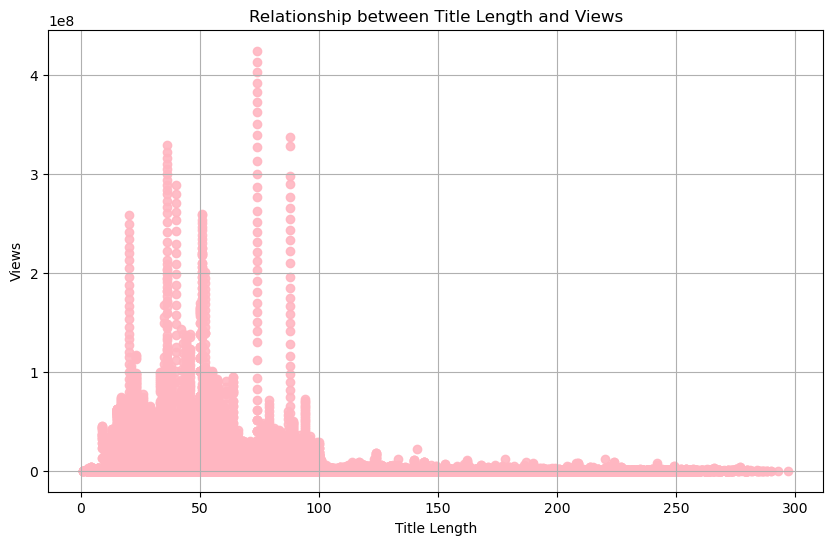

In [19]:
title_length_v_views = df_full[['title','views']]
# Calculate the length of each title and store it in a new column 'title_length'
title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)
x = title_length_v_views['title_length']
y = title_length_v_views['views']

# Create a scatter plot to visualize the relationship between title length and views
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.scatter(x, y, alpha=0.9, color='#FFB6C1')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.title('Relationship between Title Length and Views')
plt.grid(True)
plt.show()

There is no linear relationship between title length and views

English Countries

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_2718/1000217779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


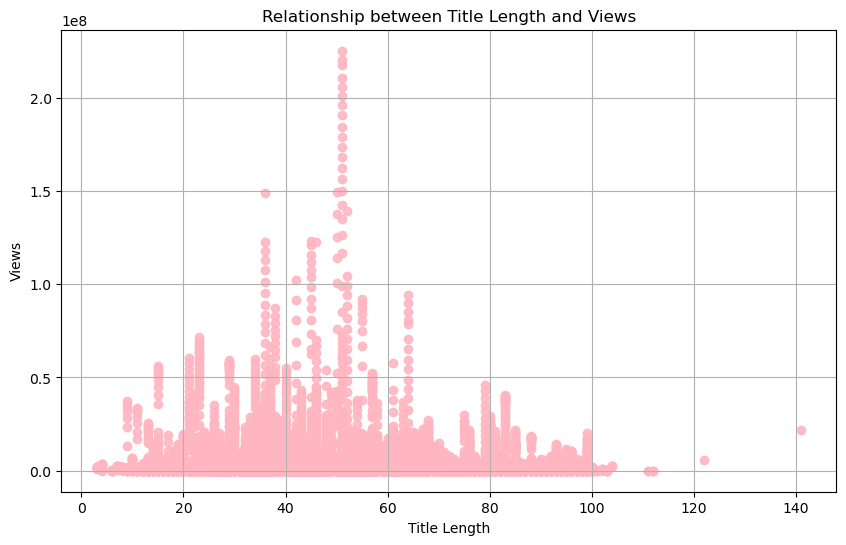

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_2718/1000217779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


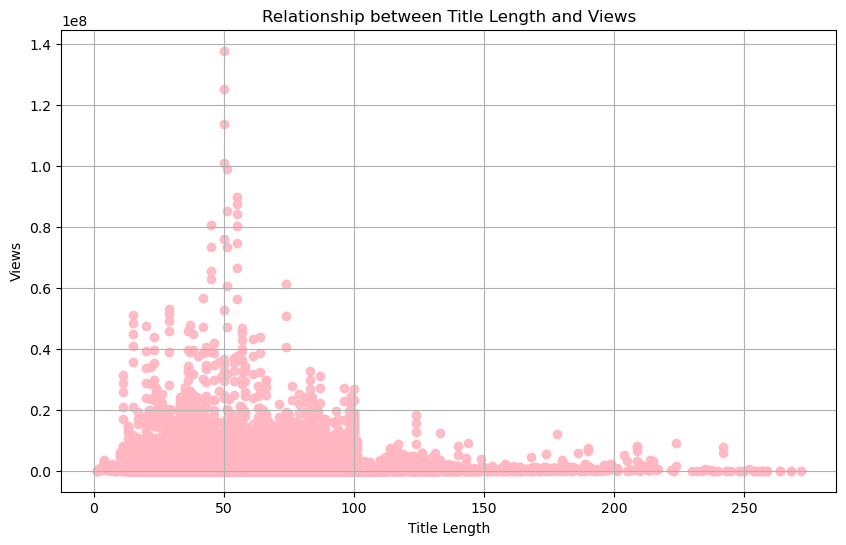

/var/folders/qz/2dg5bw_50kdcwkdm7trt45300000gn/T/ipykernel_2718/1000217779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)


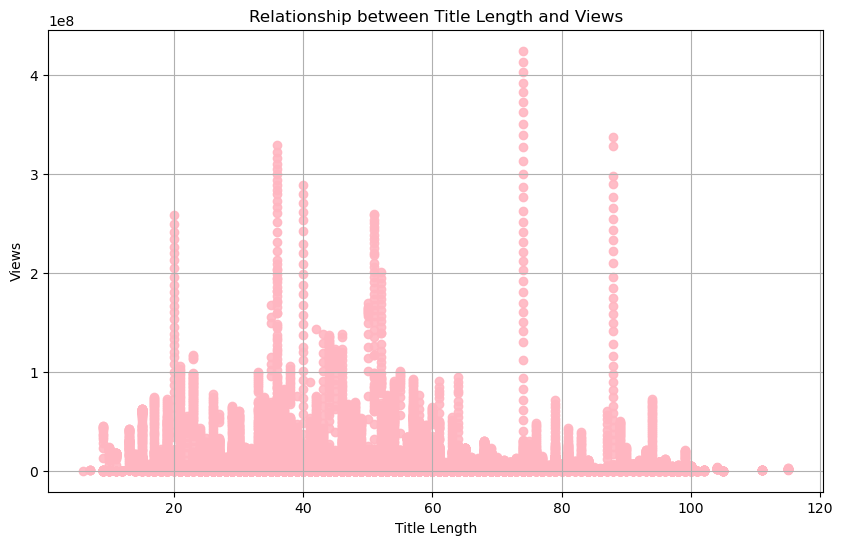

In [20]:
for c in ['US', 'CA', 'GB']:
    country_data = df_full[df_full['country']== c]
    title_length_v_views = country_data[['title','views']]
    # Calculate the length of each title and store it in a new column 'title_length'
    title_length_v_views['title_length'] = title_length_v_views['title'].apply(len)
    x = title_length_v_views['title_length']
    y = title_length_v_views['views']

    # Create a scatter plot to visualize the relationship between title length and views
    plt.figure(figsize=(10, 6))  # Adjust the figure size

    plt.scatter(x, y, alpha=0.9, color='#FFB6C1')
    plt.xlabel('Title Length')
    plt.ylabel('Views')
    plt.title('Relationship between Title Length and Views')
    plt.grid(True)
    plt.show()